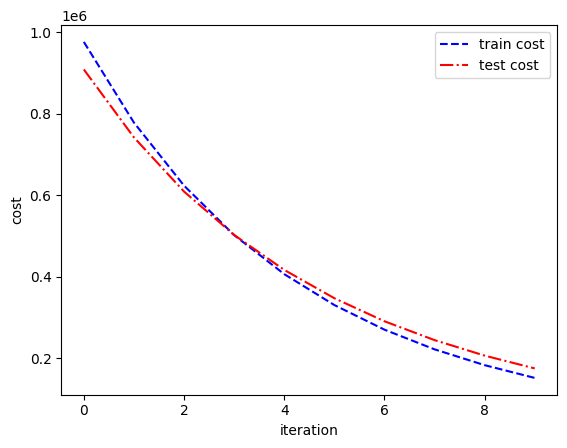

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


def generate_data(m,n):
    x = np.random.normal(loc=0, size=(m,n-1))
    theta = np.random.normal(size=(n,1))
    tmp = np.ones(shape=(m,1))
    x = np.concatenate((tmp,x),axis=1)
    noise = 0.1*np.random.normal(size= x.shape)

    y = x@theta+noise
    return (x,y)

def generate_train_test(m,n,split_ratio):
  x,y = generate_data(m,n)
  x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = split_ratio)
  return x_train, x_test, y_train, y_test

def grad(x,y,theta):
  m = x.shape[0]
  y_hat = x@theta
  g = 1/m*x.T@(y_hat-y)
  return g

def loss(x,y,theta):
  m = x.shape[0]
  y_hat = x@theta
  j = (0.5/m)*np.linalg.norm(y_hat-y)**2
  return j


x_train, x_test, y_train, y_test = generate_train_test(1000,10,0.2)
m_train, n = x_train.shape
m_test = x_test.shape[0]
theta = np.random.normal(size = (n,1))
max_iter = 1000
alpha = .01
tr_costs = list()
ts_costs = list()

for i in range(max_iter):
  g = grad(x_train, y_train, theta)
  theta = theta - alpha*g

  if i%10 ==0:
    tr_cost = loss(x_train,y_train,theta)
    ts_cost = loss(x_test,y_test,theta)
    tr_costs.append(tr_cost)
    ts_costs.append(ts_cost)

plt.plot(tr_costs,'b--', label = "train cost")
plt.plot(ts_costs,'r-.', label ='test cost')
plt.legend(loc = 'best')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

In [ ]:
theta_opt = np.linalg.inv(x_train.T @ x_train) @ (x_train.T @ y_train)
tr_cost = loss(x_train, y_train, theta_opt)
ts_cost = loss(x_test,y_test,theta_opt)
tr_cost
ts_cost

0.05009659695097147